### Imports

In [1]:
import numpy as np
import torch

from torch.utils.data import DataLoader
from torch import optim

from torchvision.datasets import MNIST
from torchvision import transforms as T


import utils
import matplotlib.pyplot as plt

# Introduction

Momentum has been introduced in the lecture as a mechanism to speed up training.
We would like to show this empirically in this exercise by an example on the MNIST dataset.
We use a simple network architecture to classify handwritten digits into 10 different classes (0-9).

Your task is to implement some parts of the training loop and study the effect of momentum with respect to the training speed.
We compare training the model with Stochastic Gradient Descent (SGD) without momentum and with a momentum of `0.9`.
To highlight that the effect is not the result of a specific hyperparameter choice, we train with different batch sizes and learning rates.
For each of these configurations, we train two models: one with SGD and the other with SGD and momentum.


In [2]:
# loading data
data_root = './data'
train_dataset = MNIST(data_root, train=True, download=True, transform=T.ToTensor())
test_dataset = MNIST(data_root, train=False, download=True, transform=T.ToTensor())

0.3%

100.0%


Extracting ./data/MNIST/raw/train-images-idx3-ubyte.gz to ./data/MNIST/raw


100.0%


Extracting ./data/MNIST/raw/train-labels-idx1-ubyte.gz to ./data/MNIST/raw




61.6%

100.0%
100.0%


Extracting ./data/MNIST/raw/t10k-images-idx3-ubyte.gz to ./data/MNIST/raw

Extracting ./data/MNIST/raw/t10k-labels-idx1-ubyte.gz to ./data/MNIST/raw



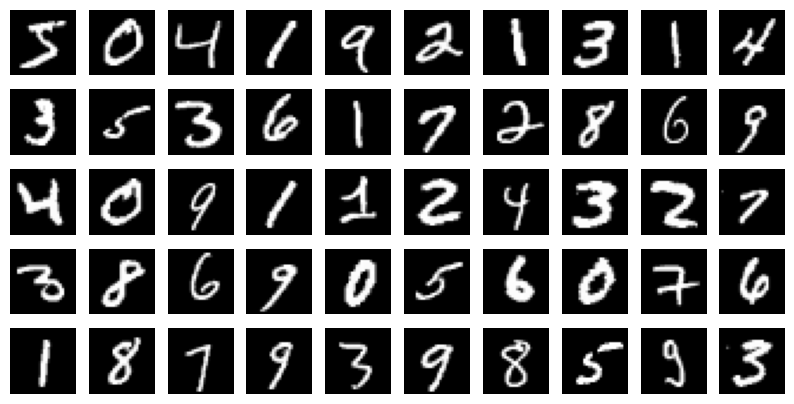

In [3]:
# visualizing samples
utils.show_samples(train_dataset)

# Training Function Implementation (20 P)

**Task:** Implement the training function based on the predefined `train_one_epoch` function provided in `utils.py`.
The training function receives a random initialized model and various hyperparameters. Your task is to
implement the training loop given the function `train_one_epoch`. We want to optimize the model with a cross entropy loss.
Further, we want to collect the final train and test accuracy and also how the training metrics progress over the training.


Therefore, also return the train loss and accuracy after each epoch of the training for further analysis.

*Hint:* to compute the final training and test accuracy after training, you can use the `accuracy` function from `utils.py`

In [4]:
def train(model, train_dataset, test_dataset, epochs=10, batch_size=32, lr=0.01, momentum=0.0):
    train_loader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True)
    test_loader = DataLoader(test_dataset, batch_size=batch_size)
    optimizer = optim.SGD(model.parameters(), lr=lr, momentum=momentum)

    # YOUR CODE HERE
    criterion = torch.nn.CrossEntropyLoss()
    arr_epoch_loss = []
    arr_epoch_train_accuracy = []
    for i in range(epochs):
        epoch_loss, accuracy = utils.train_one_epoch(model, train_loader, criterion, optimizer)
        arr_epoch_loss.append(epoch_loss)
        arr_epoch_train_accuracy.append(accuracy)
    train_acc = utils.accuracy(model, train_loader)
    test_acc = utils.accuracy(model, test_loader)
    print(f"Training accuracy: {train_acc:.3f}")
    print(f"Test accuracy: {test_acc:.3f}")
    return train_acc, test_acc, arr_epoch_loss, arr_epoch_train_accuracy

In [5]:
# sanity check for model training
# with 1 epoch, the test accuracy should be ~80%.
torch.manual_seed(1)
model = utils.Lenet5()
train(model=model, train_dataset=train_dataset, test_dataset=test_dataset, epochs=1);

Training accuracy: 0.806
Test accuracy: 0.810


In [6]:
# with 1 epoch, the test accuracy should be ~96%.
torch.manual_seed(1)
model2 = utils.Lenet5()
train(model=model2, train_dataset=train_dataset, test_dataset=test_dataset, epochs=1, momentum=0.9);

Training accuracy: 0.967
Test accuracy: 0.968


# Visualizing the effect of momentum with varying the value of learning rate (15 P)

**Task:** We want to compare the effect of momentum on the optimization process for different learning rates.
Use the previously created training function to implement the function `sweep_lr` which should train a model without momentum (`momentum=0.0`)
and momentum (`momentum=0.9`). For each of the two trained models, plot the loss value after each epoch to study how the loss progresses during training.

What can you observe from these plots? What influence does momentum have on the training and why?

Training accuracy: 0.209
Test accuracy: 0.212
Training accuracy: 0.964
Test accuracy: 0.967
Training accuracy: 0.956
Test accuracy: 0.959
Training accuracy: 0.985
Test accuracy: 0.983


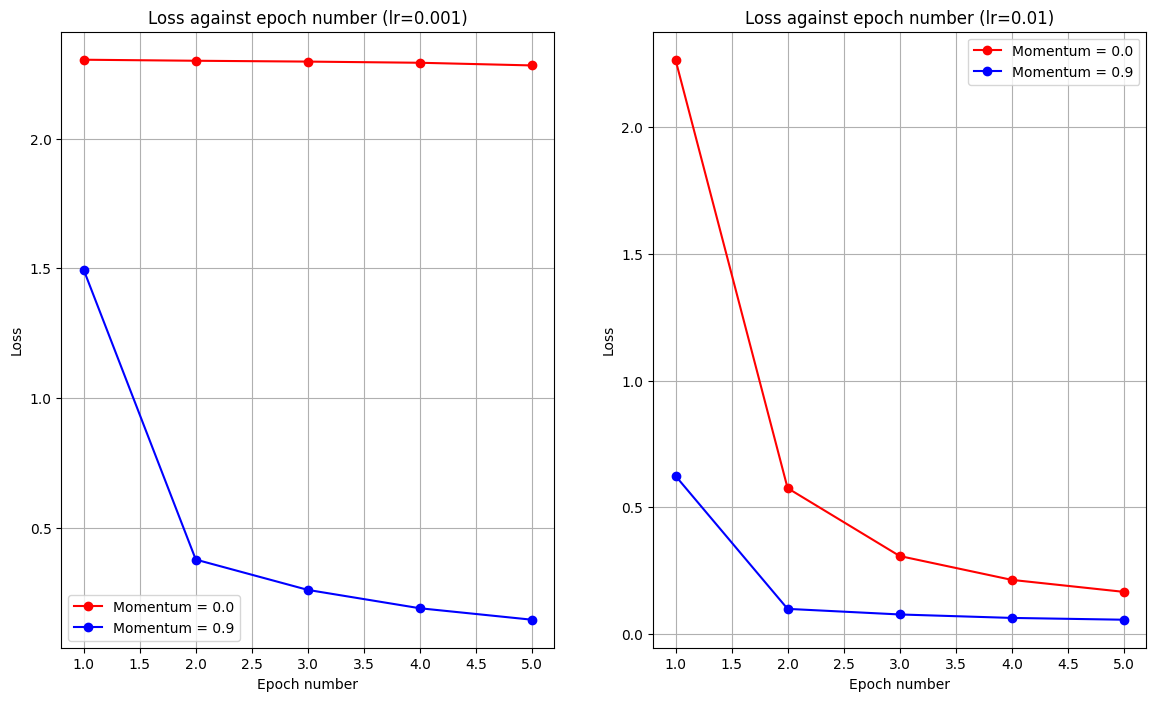

In [7]:
def sweep_lr(arr_lr, train_dataset, test_dataset, epochs=5):
    torch.manual_seed(1)

    # YOUR CODE HERE
    data_00 = []
    data_09 = []
    for lr in arr_lr:
        model_00 = utils.Lenet5()
        model_09 = utils.Lenet5()
        train_acc_00, test_acc_00, arr_epoch_loss_00, arr_epoch_train_accuracy_00 = train(model=model_00, train_dataset=train_dataset, test_dataset=test_dataset, epochs=epochs, momentum=0.0, lr=lr)
        train_acc_09, test_acc_09, arr_epoch_loss_09, arr_epoch_train_accuracy_09 = train(model=model_09, train_dataset=train_dataset, test_dataset=test_dataset, epochs=epochs, momentum=0.9, lr=lr)
        data_00.append(arr_epoch_loss_00)
        data_09.append(arr_epoch_loss_09)
    
    fig, ax = plt.subplots(1, len(arr_lr), figsize=(14,8))
    for i in range(len(ax)):
        ax[i].set_title(f"Loss against epoch number (lr={arr_lr[i]})")
        ax[i].plot(range(1, epochs+1), data_00[i], color='red', label="Momentum = 0.0", marker='o')
        ax[i].plot(range(1, epochs+1), data_09[i], color='blue', label="Momentum = 0.9", marker='o')
        ax[i].set_xlabel("Epoch number")
        ax[i].set_ylabel("Loss")
        ax[i].legend()
        ax[i].grid()

sweep_lr([1e-3, 1e-2], train_dataset, test_dataset)

# Visualizing the effect of momentum when varying the value of batch size (15 P)
**Task:** We want to compare the effect of momentum on the optimization process for different batch sizes.
Similar to the `sweep_lr` function, implement the function `sweep_batchsize` which should train a model without momentum (`momentum=0.0`)
and momentum (`momentum=0.9`) with the specified batch size. For each of the two trained models, plot the loss value after each epoch to study how the loss progresses during training.

What can you observe from these plots?

Training accuracy: 0.973
Test accuracy: 0.973
Training accuracy: 0.988
Test accuracy: 0.986
Training accuracy: 0.956
Test accuracy: 0.959
Training accuracy: 0.985
Test accuracy: 0.983
Training accuracy: 0.933
Test accuracy: 0.938
Training accuracy: 0.982
Test accuracy: 0.982


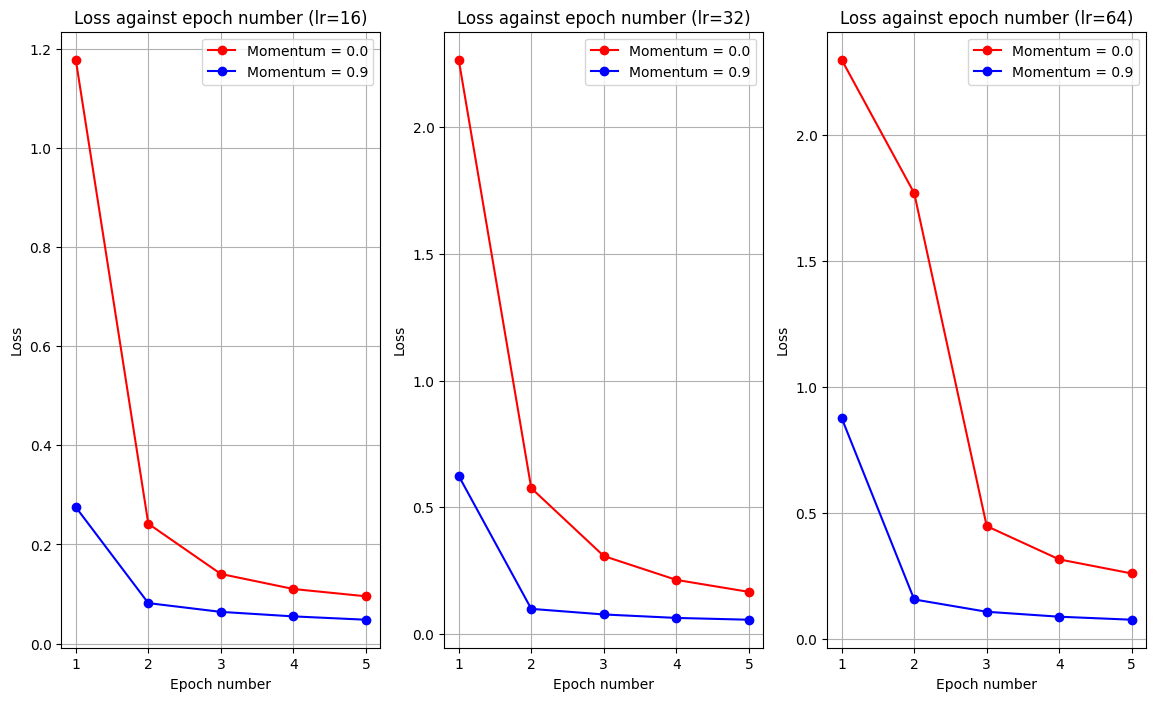

In [8]:
def sweep_batchsize(arr_batchsize, train_dataset, test_dataset, epochs=5):
    torch.manual_seed(1)

    # YOUR CODE HERE
    data_00 = []
    data_09 = []
    for bs in arr_batchsize:
        model_00 = utils.Lenet5()
        model_09 = utils.Lenet5()
        train_acc_00, test_acc_00, arr_epoch_loss_00, arr_epoch_train_accuracy_00 = train(model=model_00, train_dataset=train_dataset, test_dataset=test_dataset, epochs=epochs, momentum=0.0, batch_size=bs)
        train_acc_09, test_acc_09, arr_epoch_loss_09, arr_epoch_train_accuracy_09 = train(model=model_09, train_dataset=train_dataset, test_dataset=test_dataset, epochs=epochs, momentum=0.9, batch_size=bs)
        data_00.append(arr_epoch_loss_00)
        data_09.append(arr_epoch_loss_09)
    
    fig, ax = plt.subplots(1, len(arr_batchsize), figsize=(14,8))
    for i in range(len(ax)):
        ax[i].set_title(f"Loss against epoch number (lr={arr_batchsize[i]})")
        ax[i].plot(range(1, epochs+1), data_00[i], color='red', label="Momentum = 0.0", marker='o')
        ax[i].plot(range(1, epochs+1), data_09[i], color='blue', label="Momentum = 0.9", marker='o')
        ax[i].set_xlabel("Epoch number")
        ax[i].set_ylabel("Loss")
        ax[i].legend()
        ax[i].grid()
      
sweep_batchsize([16, 32, 64], train_dataset, test_dataset)